Загрузка и предобработка данных CIFAR-10

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Загрузка данных CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование меток в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Вывод информации о данных
print("Размер обучающей выборки:", x_train.shape)
print("Размер тестовой выборки:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 67s 0us/step
Размер обучающей выборки: (50000, 32, 32, 3)
Размер тестовой выборки: (10000, 32, 32, 3)


Классификация изображений с помощью SVM и KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Используем подвыборку данных для ускорения обучения
x_train_subset = x_train[:5000].reshape(5000, -1)  # Преобразуем изображения в одномерные векторы
y_train_subset = np.argmax(y_train[:5000], axis=1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_subset, y_train_subset)
y_pred_knn = knn.predict(x_test_flat)
accuracy_knn = accuracy_score(np.argmax(y_test, axis=1), y_pred_knn)
print(f"Точность KNN: {accuracy_knn * 100:.2f}%")

# SVM
svm = SVC()
svm.fit(x_train_subset, y_train_subset)
y_pred_svm = svm.predict(x_test_flat)
accuracy_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
print(f"Точность SVM: {accuracy_svm * 100:.2f}%")

Точность KNN: 25.90%
Точность SVM: 44.34%


Создание многослойного перцептрона (MLP)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer

# Создание модели MLP
model_mlp = Sequential([
    InputLayer(shape=(32, 32, 3)),  # Указываем входную форму
    Flatten(),  # Преобразуем изображение в одномерный вектор
    Dense(512, activation='relu'), #Полносвязный слой с 512 нейронами
    Dropout(0.2), #На каждом шаге обучения случайным образом отключаются 20% нейронов, что помогает модели обобщать данные и избегать переобучения.
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # Выходной слой для 10 классов. Функция активации Softmax, которая преобразует выходные значения в вероятности принадлежности к каждому классу
])

# Компиляция модели
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Оценка точности на тестовых данных
test_loss_mlp, test_accuracy_mlp = model_mlp.evaluate(x_test, y_test)
print(f"Точность MLP на тестовых данных:  {test_accuracy_mlp * 100:.2f}%")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.2225 - loss: 2.2143 - val_accuracy: 0.3444 - val_loss: 1.8458
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.3221 - loss: 1.8649 - val_accuracy: 0.3698 - val_loss: 1.7639
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.3489 - loss: 1.7929 - val_accuracy: 0.3838 - val_loss: 1.7284
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.3598 - loss: 1.7747 - val_accuracy: 0.3781 - val_loss: 1.7266
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.3718 - loss: 1.7304 - val_accuracy: 0.3848 - val_loss: 1.6899
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.3824 - loss: 1.7176 - val_accuracy: 0.3992 - val_loss: 1.6707
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.3893 - loss: 1.6963 - val_accuracy: 0.4216 - val_loss: 1.6306
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.3996 - loss: 1.6642 - 

Создание сверточной нейронной сети (CNN)

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Создание модели CNN
model_cnn = Sequential([
    #Сверточный Применяет фильтры к входным данным для извлечения локальных признаков
    InputLayer(shape=(32, 32, 3)),  # Указываем входную форму
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Первый свёрточный слой
    MaxPooling2D((2, 2)), # Слой подвыборки
    Conv2D(64, (3, 3), activation='relu'), # Второй свёрточный слой
    MaxPooling2D((2, 2)),#Слой Подвыборки
    Flatten(), #Преобразует многомерные данные в одномерный вектор  (для передачи в полносвязные слои)
    Dense(128, activation='relu'), #Полносвязный слой (Dense)
    Dropout(0.2),
    Dense(10, activation='softmax') # Выходной полносвязный слой (Dense)
])

# Компиляция модели
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Оценка точности на тестовых данных
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(x_test, y_test)
print(f"Точность CNN на тестовых данных: {test_accuracy_cnn * 100:.2f}%")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.3415 - loss: 1.8089 - val_accuracy: 0.5221 - val_loss: 1.3534
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.5360 - loss: 1.2943 - val_accuracy: 0.5989 - val_loss: 1.1529
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6071 - loss: 1.1135 - val_accuracy: 0.6323 - val_loss: 1.0445
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6369 - loss: 1.0152 - val_accuracy: 0.6537 - val_loss: 0.9918
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.6719 - loss: 0.9384 - val_accuracy: 0.6694 - val_loss: 0.9541
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6956 - loss: 0.8673 - val_accuracy: 0.6581 - val_loss: 0.9811
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.7112 - loss: 0.8177 - val_accuracy: 0.6560 - val_loss: 1.0093
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.7332 - loss: 0.7593 - 

Визуализация результатов

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


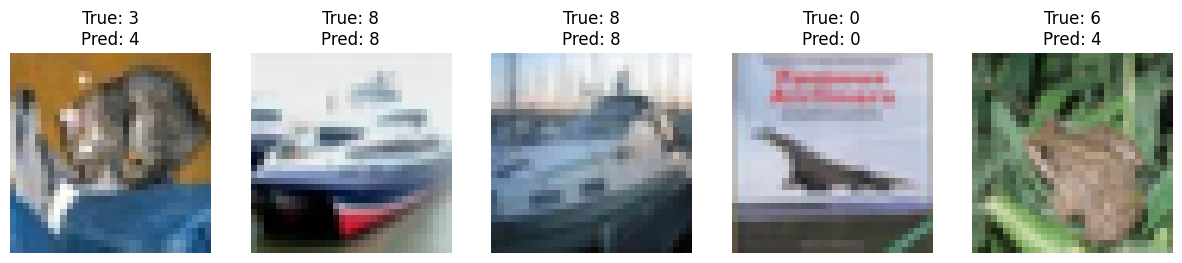

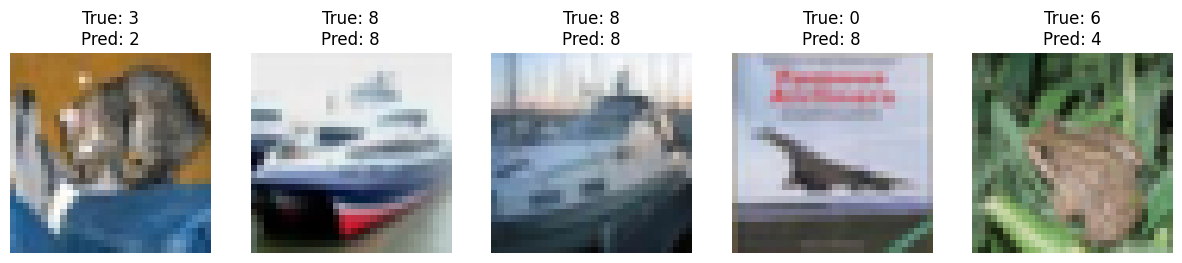

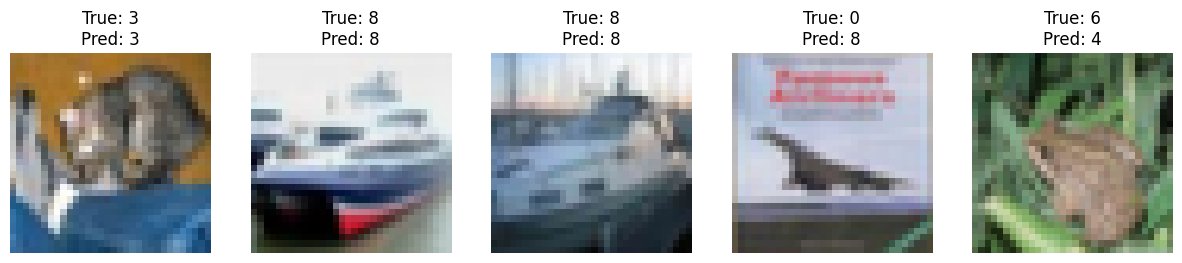

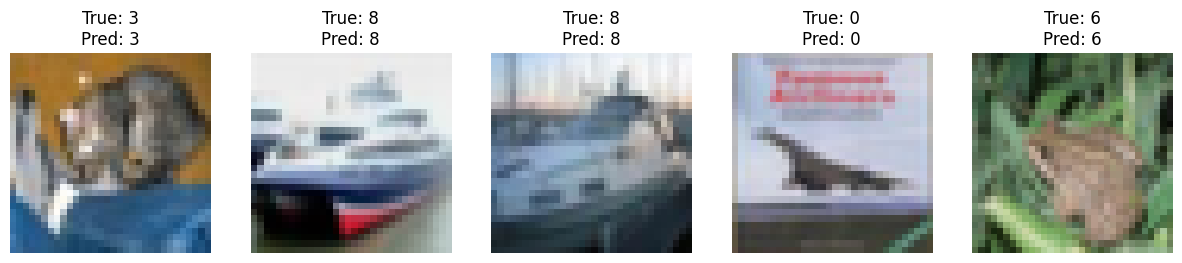

In [9]:
import matplotlib.pyplot as plt

# Функция для отображения изображений и предсказаний
def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {np.argmax(labels[i])}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Предсказания для тестовых данных
y_pred_mlp = np.argmax(model_mlp.predict(x_test), axis=1)
y_pred_cnn = np.argmax(model_cnn.predict(x_test), axis=1)

# Визуализация результатов
plot_images(x_test, y_test, y_pred_knn, num_images=5)  # KNN
plot_images(x_test, y_test, y_pred_svm, num_images=5)  # SVM
plot_images(x_test, y_test, y_pred_mlp, num_images=5)  # MLP
plot_images(x_test, y_test, y_pred_cnn, num_images=5)  # CNN